In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load in the data
df = pd.read_csv("https://raw.githubusercontent.com/Gaelim/Diamond-Price-Prediction/main/diamonds2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
#Check the head of the data
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

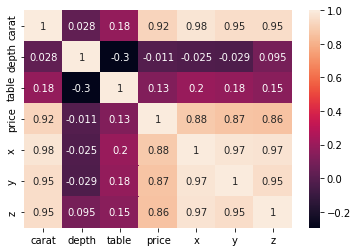

In [9]:
sns.heatmap(df.corr(),annot=True);


Prepare the data set and work on feature engineering
There is a high amount of correlation between the the diamond dimensions. So it might be better to eliminate some of these due to the high amount correlation.



In [10]:
#feature engineering
df['symmetry'] = df['x']/df['y']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,symmetry
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [13]:
df_trans=pd.get_dummies(df)
X = df_trans.drop(['price','x','y','z'],axis=1)
y=df_trans['price']
features = X.columns

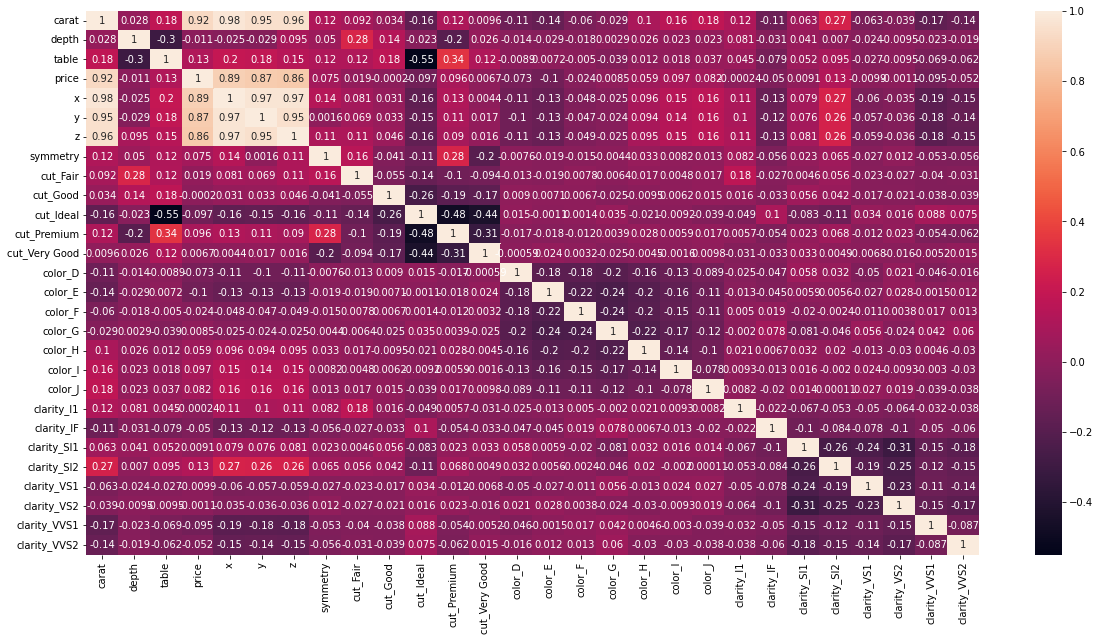

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df_trans.corr(),annot=True);

In [15]:
#scale the data
s = StandardScaler()
X = s.fit_transform(X)

In [17]:
# To get the Training and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y)


**Prediction and Evaluate the Model Performance**


In [20]:
#Creating a Data frame to hold the results
models_eval = pd.DataFrame(index=['Null','KNN','MLR'],columns=['RMSE'])


In [19]:
ypred_null = y_train.mean()

**K-Neighbours Regressor**


In [21]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


**Random Forrest Regression**


In [22]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)
y_pred2=y_pred = rf.predict(X_test)

**Linear Regression**


In [23]:
lin = LinearRegression()
lin = lin.fit(X_train,y_train)
y_pred3 = lin.predict(X_test)

**Lasso Regression**


In [24]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred4 = lasso.predict(X_test)


In [25]:
model_eval=pd.DataFrame(index=['KNN','MLR'],columns=['RMSE'])
model_eval.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['RF','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['MLR','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['Lasso','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred4))
model_eval.loc['NULL','RMSE'] = ypred_null
model_eval

,RMSE
KNN,573.261351
MLR,1175.841799
RF,573.261351
Lasso,1175.753192
NULL,3925.020989


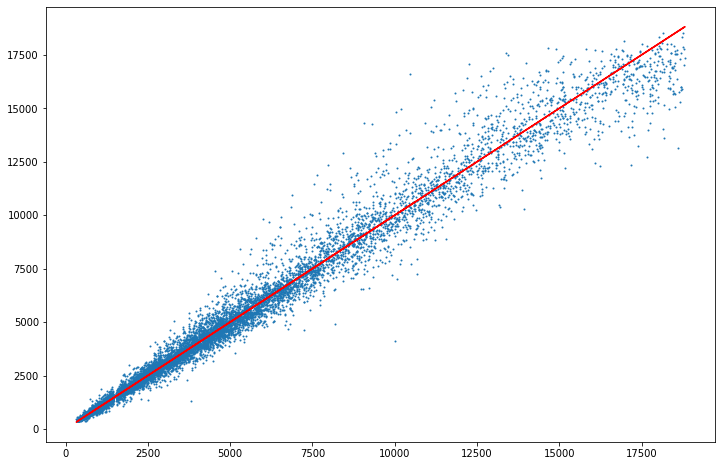

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred,s=1)
ax.plot(y_test,y_test,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


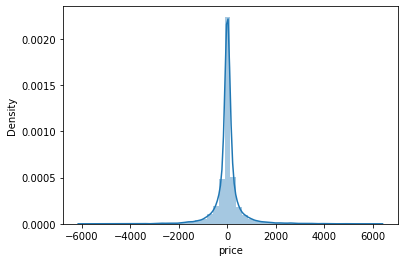

In [29]:
sns.distplot(y_pred-y_test)


In [30]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred2 = lin.predict(X_test)
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(y_pred2,y_test))

In [31]:
#features importance
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [32]:
model.feature_importances_.tolist()

[0.8792956001149672,
 0.004115097901051374,
 0.003922066813418672,
 0.004892392144733572,
 0.0011588402349995152,
 0.0006447250166686658,
 0.0022762436062107065,
 0.000900034732640338,
 0.0005206195690247113,
 0.0037786494261368587,
 0.004170356604659326,
 0.0019216058346453486,
 0.0032006604513337236,
 0.006250270680502155,
 0.008122214023105619,
 0.010094547491159055,
 0.015752863095709106,
 0.0031034214024051724,
 0.012983280626430957,
 0.017509183240257218,
 0.004195641860394435,
 0.005399415496830548,
 0.002584134343091362,
 0.0032081352896243844]